In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
# from google.colab import files
from sklearn.model_selection import train_test_split

In [6]:
# upload file
# uploaded = files.upload()


# sperate x and y values
malwareData=pd.read_csv('TUANDROMD.csv')

X=malwareData.iloc[:, :-1].values
Y=malwareData.iloc[:, -1:].values

# separating the dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98.73%
Thresh=0.000, n=241, Accuracy: 98

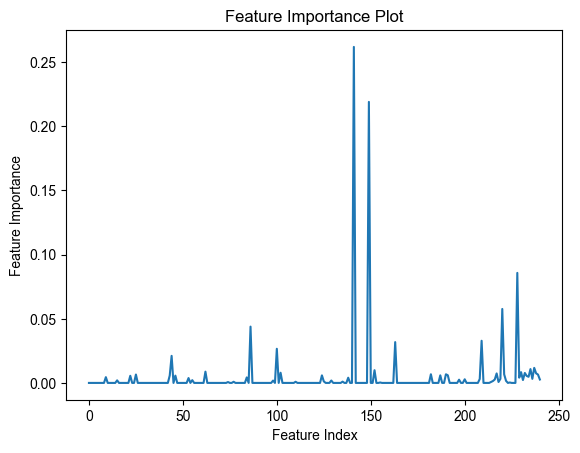

In [7]:
# Assuming 'model' is your trained model
sns.lineplot(x=range(len(model.feature_importances_)), y=model.feature_importances_)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
sns.set_style("dark")
plt.show()

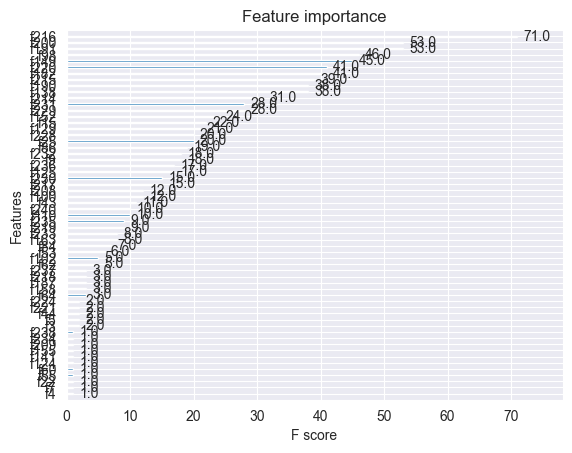

In [7]:
# plot feature importance
plot_importance(model)
plt.show()

In [8]:
df = pd.read_csv('TUANDROMD.csv')

In [9]:
first_index = df.columns[0]
first_index

'ACCESS_ALL_DOWNLOADS'

In [10]:
first_index = df.columns[0]
first_index

'ACCESS_ALL_DOWNLOADS'

In [11]:
first_index = df.columns[0]
first_index

'ACCESS_ALL_DOWNLOADS'

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
from  mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [15]:
X = df.drop('Label',axis=1)
y = df['Label']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3124, 241), (1340, 241), (3124,), (1340,))

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Create an XGBClassifier
xgb = XGBClassifier()

# Create an SFS object
sfs = SFS(estimator=xgb,       # Use XGBClassifier as our estimator
          k_features=(1, 20),   # Consider any feature combination between 1 and 30
          forward=True,        # Set forward to True when we want to perform SFS
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy
          cv=5)                # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_train_scaled, y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via 

Best accuracy score: 0.98
Best subset (indices): (15, 43, 84, 85, 102, 141, 149, 163, 182, 191, 228, 232, 240)
Best subset (corresponding names): ('15', '43', '84', '85', '102', '141', '149', '163', '182', '191', '228', '232', '240')


In [22]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Create an XGBClassifier
xgb = XGBClassifier()

# Create an SFS object
sfs = SFS(estimator=xgb,       # Use XGBClassifier as our estimator
          k_features=(1,20),   # Consider any feature combination between 1 and 30
          forward=False,        # Set forward to True when we want to perform SFS
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy
          cv=5)                # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_train_scaled, y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via 

Best accuracy score: 0.99
Best subset (indices): (15, 25, 86, 129, 138, 163, 190, 191, 200, 215, 216, 220, 228, 229, 231, 236, 238)
Best subset (corresponding names): ('15', '25', '86', '129', '138', '163', '190', '191', '200', '215', '216', '220', '228', '229', '231', '236', '238')
